In [1]:
%load_ext autoreload

In [2]:
%autoreload
import pathlib
import matplotlib.pyplot as plt
import pke
import networkx as nx

In [3]:
sample_text_path = pathlib.Path('sample.txt')
assert sample_text_path.exists()
with open(sample_text_path) as f:
    print(f.read())

Compatibility of systems of linear constraints over the set of natural numbers.
Criteria of compatibility of a system of linear Diophantine equations, strict
inequations, and nonstrict inequations are considered. Upper bounds for
components of a minimal set of solutions and algorithms of construction of
minimal generating sets of solutions for all types of systems are given.
These criteria and the corresponding algorithms for constructing a minimal
supporting set of solutions can be used in solving all the considered types
systems and systems of mixed types.


In [12]:
# define the set of valid Part-of-Speeches
pos = {'NOUN', 'PROPN', 'ADJ'}

# 1. create a SingleRank extractor.
extractor = pke.unsupervised.SingleRank()

# 2. load the content of the document.
extractor.load_document(input=str(sample_text_path),
                        language='en',
                        normalization=None)

# 3. select the longest sequences of nouns and adjectives as candidates.
extractor.candidate_selection(pos=pos)

# 4. weight the candidates using the sum of their word's scores that are
#    computed using random walk. In the graph, nodes are words of
#    certain part-of-speech (nouns and adjectives) that are connected if
#    they occur in a window of 10 words.
extractor.candidate_weighting(window=10,
                              pos=pos)

# 5. get the 10-highest scored candidates as keyphrases
keyphrases = extractor.get_n_best(n=10)

In [13]:
keyphrases

[('minimal set', 0.13381498868284988),
 ('linear diophantine equations', 0.12611341955040703),
 ('nonstrict inequations', 0.09497428564103515),
 ('linear constraints', 0.08218871707454306),
 ('set', 0.0674185581624149),
 ('minimal', 0.06639661052043498),
 ('natural numbers', 0.06503630073869206),
 ('mixed types', 0.06453867551328374),
 ('solutions', 0.06319720177634525),
 ('systems', 0.0628752837209267)]

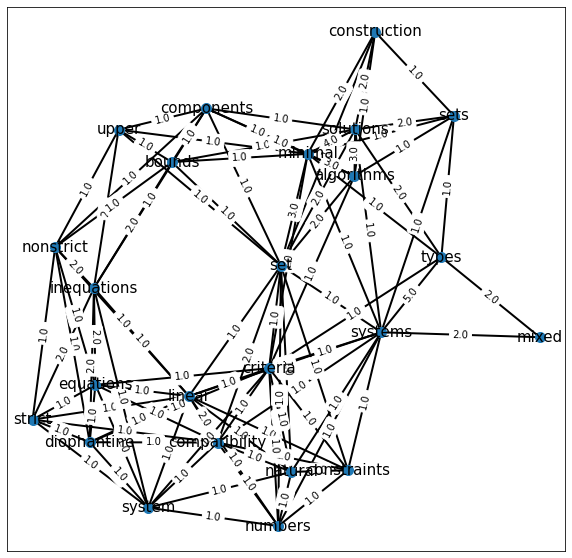

In [14]:
plt.figure(figsize=(10, 10))
G = extractor.graph
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=100)

# edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=2)

# labels
nx.draw_networkx_labels(G, pos, font_size=15, font_family="sans-serif");
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels);

In [15]:
extractor.candidates

defaultdict(pke.data_structures.Candidate,
            {'compatibility': <pke.data_structures.Candidate at 0x13308a2d0>,
             'systems': <pke.data_structures.Candidate at 0x1329cdad0>,
             'linear constraints': <pke.data_structures.Candidate at 0x1329cdc50>,
             'set': <pke.data_structures.Candidate at 0x1329cd050>,
             'natural numbers': <pke.data_structures.Candidate at 0x1329cdd90>,
             'criteria': <pke.data_structures.Candidate at 0x1329cd450>,
             'system': <pke.data_structures.Candidate at 0x1329cd590>,
             'linear diophantine equations': <pke.data_structures.Candidate at 0x1329cd3d0>,
             'strict': <pke.data_structures.Candidate at 0x13146b590>,
             'inequations': <pke.data_structures.Candidate at 0x13146b790>,
             'nonstrict inequations': <pke.data_structures.Candidate at 0x1231bebd0>,
             'upper bounds': <pke.data_structures.Candidate at 0x13282c7d0>,
             'components': <p